<a href="https://colab.research.google.com/github/shrivatsashetty/Projects/blob/main/Synamedia_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
main_df = pd.read_csv("/content/drive/MyDrive/Data-Science/2DaysViewingSession.csv")

# **Tabular form**

In [4]:
main_df

,state,event_start_tz,duration_seconds,content_type,content,content_source
0,Selangor,2023-08-27 11:03:13.686 Asia/Singapore,40,VOD,Ombak Rindu,astro.2d
1,Kuala Lumpur,2023-08-27 10:48:56.982 Asia/Singapore,424,VOD,Pada Zaman Dahulu S4 Ep08,astro.7d
2,Johor,2023-08-27 10:56:51.851 Asia/Singapore,398,VOD,Upin & Ipin S16 Ep34,astro.30d
3,Kuala Lumpur,2023-08-27 10:31:40.717 Asia/Singapore,1411,VOD,Tanah Kubur S13 Ep08,astro.30d
4,Penang,2023-08-27 10:24:16.194 Asia/Singapore,2526,VOD,Narcotics Heroes Ep17,astro.30d
...,...,...,...,...,...,...
26011962,Kuala Lumpur,2023-08-28 15:04:59.497 Asia/Singapore,1,CDVR,Ghost of Relativity,TVB CLASSIC HD
26011963,Kuala Lumpur,2023-08-28 15:05:03.023 Asia/Singapore,906,CDVR,Ghost of Relativity,TVB CLASSIC HD
26011964,Kuala Lumpur,2023-08-28 15:05:16.592 Asia/Singapore,362,VOD,Upin & Ipin S15 Ep34,astro.30d
26011965,Sarawak,2023-08-28 14:59:50.687 Asia/Singapore,1241,VOD,Mechamato Ep01,astro.30d


# *main dataframe shape*

In [5]:
main_df.shape

(26011967, 6)

In [6]:
initial_record_count = main_df.shape[0]

### ***the main dataframe contains 2,60,11,967 records***

In [7]:
main_df["state"].value_counts()

Kuala Lumpur                  6907074
Selangor                      2646489
Penang                         754808
Johor                          725571
Perak                          406297
Sarawak                        229300
Negeri Sembilan                220280
Sabah                          209076
Melaka                         119882
Kedah                           94362
Kelantan                        62248
Pahang                          52418
UNKNOWN                         49041
Terengganu                      31766
Putrajaya                        7275
Perlis                           1872
Karnataka                         379
Labuan                            370
ERROR                             169
Maharashtra                       129
Seoul                              10
Uttar Pradesh                       6
Occitanie                           5
England                             5
Victoria                            3
Jerusalem                           3
Tamil Nadu  

# main dataset columns

In [8]:
i = 1
print("The dataset contains the following columns")
for column in main_df.columns:
  print(i,".",column)
  i+=1

The dataset contains the following columns
1 . state
2 . event_start_tz
3 . duration_seconds
4 . content_type
5 . content
6 . content_source


In [9]:
main_df.isna().sum()

state               13493121
event_start_tz             0
duration_seconds           0
content_type               0
content               110136
content_source          3780
dtype: int64

# creating another data frame called cleaned_df by cleaning nulls

In [10]:
cleaned_df = main_df.dropna()

In [11]:
cleaned_df.shape

(12466618, 6)

In [12]:
type(cleaned_df.shape)

tuple

# difference b/w new and orignal data frame

In [13]:
records_differenece = main_df.shape[0] - cleaned_df.shape[0]

In [14]:
percent_record_difference = (records_differenece / main_df.shape[0]) * 100

In [15]:
del records_differenece


### percentage difference in records after dropping rows

In [16]:
percent_record_difference

52.073528311027

In [17]:
del percent_record_difference

In [18]:
cleaned_df.describe()

,duration_seconds
count,1.246662e+07
mean,5.246197e+02
std,1.160204e+03
min,0.000000e+00
25%,1.000000e+01
50%,1.250000e+02
75%,4.280000e+02
max,3.239500e+04


In [19]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466618 entries, 0 to 26011966
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   state             object
 1   event_start_tz    object
 2   duration_seconds  int64 
 3   content_type      object
 4   content           object
 5   content_source    object
dtypes: int64(1), object(5)
memory usage: 665.8+ MB


In [20]:
uniq_states = cleaned_df['state'].value_counts()

### List of distinct states

In [21]:
uniq_states


Kuala Lumpur                  6878719
Selangor                      2634243
Penang                         751319
Johor                          722522
Perak                          404518
Sarawak                        228747
Negeri Sembilan                219438
Sabah                          208386
Melaka                         119456
Kedah                           94178
Kelantan                        62062
Pahang                          52238
UNKNOWN                         48884
Terengganu                      31681
Putrajaya                        7271
Perlis                           1869
Karnataka                         379
Labuan                            370
ERROR                             169
Maharashtra                       129
Seoul                              10
Uttar Pradesh                       6
Occitanie                           5
England                             5
Victoria                            3
Jerusalem                           3
Tamil Nadu  

In [22]:
del uniq_states

# List of actual Malaysian states plus federal territories

In [23]:
states_list = np.array(["Perlis", "Kedah", "Penang", "Perak", "Selangor", "Negeri Sembilan",
               "Melaka", "Johor", "Kelantan", "Terengganu", "Pahang", "Kuala Lumpur", "Putrajaya", "Sabah", "Sarawak", "Labuan" ])

In [24]:
len(states_list)

16

# filtering duplicate state if any

In [25]:
states_list = np.array(list(set(states_list)))

In [26]:
for state in states_list:
  print(state)

Melaka
Sabah
Perlis
Johor
Labuan
Penang
Putrajaya
Kelantan
Perak
Pahang
Kuala Lumpur
Selangor
Kedah
Negeri Sembilan
Sarawak
Terengganu


In [27]:
len(states_list)

16

# Filtering  non Malaysian states

In [28]:
cleaned_df = cleaned_df[cleaned_df['state'].isin(states_list)]

In [29]:
type(cleaned_df['state'].isin(states_list))

pandas.core.series.Series

In [30]:
cleaned_df_states = cleaned_df['state'].value_counts()

In [31]:
cleaned_df_states

Kuala Lumpur       6878719
Selangor           2634243
Penang              751319
Johor               722522
Perak               404518
Sarawak             228747
Negeri Sembilan     219438
Sabah               208386
Melaka              119456
Kedah                94178
Kelantan             62062
Pahang               52238
Terengganu           31681
Putrajaya             7271
Perlis                1869
Labuan                 370
Name: state, dtype: int64

In [32]:
type(cleaned_df_states)

pandas.core.series.Series

In [33]:
cleaned_df_states.sum()

12417017

In [34]:
cleaned_df_states.count()

16

### hence the **final version of cleaned_df** contains list of only 16 states which is actual no of states in malaysia

In [35]:
cleaned_df.shape

(12417017, 6)

In [36]:
del cleaned_df_states # to free up memory

## Till here we have a final version of cleaned dataframe

# Now scaling down the dataset using Random sampling technique



In [37]:
sample_size = int(cleaned_df.shape[0] * 0.4)

In [38]:
sample_size

4966806

In [39]:
sampled_df = cleaned_df.sample(n=sample_size, random_state=42)

# Now we consider only those records whose watch duration is non-zero

In [40]:
nz_duration_df = sampled_df[sampled_df["duration_seconds"] !=0]

In [41]:
nz_duration_df

,state,event_start_tz,duration_seconds,content_type,content,content_source
14622656,Selangor,2023-08-28 19:37:11.438 Asia/Singapore,119,VOD,Lagu Didi & Friends S3 Ep31,astro.30d
24953294,Kuala Lumpur,2023-08-29 00:54:11.028 Asia/Singapore,378,VOD,Upin & Ipin S5 Ep06,astro.30d
12353742,Selangor,2023-08-28 00:55:21.046 Asia/Singapore,1949,LINEAR,(L) PL: Newcastle vs Liverpool,ASSP3 HD
4993584,Selangor,2023-08-27 14:08:21.937 Asia/Singapore,87,LINEAR,A Pillow Case of Mystery,TVB CLASSIC HD
20949672,Johor,2023-08-28 13:51:03.669 Asia/Singapore,128,VOD,Lagu Didi & Friends S2 Ep08,astro.30d
...,...,...,...,...,...,...
21510289,Selangor,2023-08-28 21:41:16.559 Asia/Singapore,4,Play From Start,Majalah 3,TV3
13690390,Kuala Lumpur,2023-08-28 01:48:37.945 Asia/Singapore,2216,VOD,Jangan Menangis Cinta Ep18,astro.30d
19056004,Kuala Lumpur,2023-08-28 17:35:44.997 Asia/Singapore,49,LINEAR,Arsenal TV : Arsenal Vs Fulham,beIN SPORTS
20244015,Selangor,2023-08-28 22:16:24.330 Asia/Singapore,66,VOD,Where's Chicky? S2 Ep14,astro.7d


In [42]:
nz_duration_df.shape

(4378496, 6)

In [43]:
(nz_duration_df.shape[0] / main_df.shape[0]) * 100

16.832621692930797

# Delete main data frame to free up memory

In [44]:
del main_df

# Feature Engineering & Extraction
* Adding date, time, day some extra columns

In [45]:
datetime_format = "%Y-%m-%d %H:%M:%S.%f %Z"

# Converting the column to datetime using the specified format
nz_duration_df['event_start_tz'] = pd.to_datetime(nz_duration_df['event_start_tz'], format=datetime_format)

# Checking the data type of the 'event_start_tz' column
print(nz_duration_df['event_start_tz'].dtype)


datetime64[ns, Asia/Singapore]


<ipython-input-45-3c5a96f529eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nz_duration_df['event_start_tz'] = pd.to_datetime(nz_duration_df['event_start_tz'], format=datetime_format)


In [46]:
nz_duration_df['date'] = nz_duration_df['event_start_tz'].dt.date
nz_duration_df['time'] = nz_duration_df['event_start_tz'].dt.time
nz_duration_df['timezone'] = nz_duration_df['event_start_tz'].dt.tz
nz_duration_df['end_time'] = nz_duration_df['event_start_tz'] + pd.to_timedelta(nz_duration_df['duration_seconds'], unit='s')
nz_duration_df['timestamp'] = nz_duration_df['event_start_tz'].apply(lambda x: x.timestamp())

# Converting the 'date' column to a datetime format
nz_duration_df['date'] = pd.to_datetime(nz_duration_df['date'])

# Adding a new 'day' column to represent the day of the week
nz_duration_df['day'] = nz_duration_df['date'].dt.day_name()



<ipython-input-46-0930089d3fde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nz_duration_df['date'] = nz_duration_df['event_start_tz'].dt.date
<ipython-input-46-0930089d3fde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nz_duration_df['time'] = nz_duration_df['event_start_tz'].dt.time
<ipython-input-46-0930089d3fde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [47]:
nz_duration_df["day"].value_counts()

Monday      2214728
Sunday      2002188
Tuesday      161559
Saturday         21
Name: day, dtype: int64

In [48]:
nz_duration_df = nz_duration_df[nz_duration_df['day'].isin(['Sunday', 'Monday'])]


In [49]:
nz_duration_df.shape

(4216916, 12)

In [50]:
nz_duration_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4216916 entries, 14622656 to 21151475
Data columns (total 12 columns):
 #   Column            Dtype                         
---  ------            -----                         
 0   state             object                        
 1   event_start_tz    datetime64[ns, Asia/Singapore]
 2   duration_seconds  int64                         
 3   content_type      object                        
 4   content           object                        
 5   content_source    object                        
 6   date              datetime64[ns]                
 7   time              object                        
 8   timezone          object                        
 9   end_time          datetime64[ns, Asia/Singapore]
 10  timestamp         float64                       
 11  day               object                        
dtypes: datetime64[ns, Asia/Singapore](2), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 418.2+ MB


In [51]:
nz_duration_df["event_start_tz"][0]


Timestamp('2023-08-27 11:03:13.686000+0800', tz='Asia/Singapore')

In [52]:
nz_duration_df

,state,event_start_tz,duration_seconds,content_type,content,content_source,date,time,timezone,end_time,timestamp,day
14622656,Selangor,2023-08-28 19:37:11.438000+08:00,119,VOD,Lagu Didi & Friends S3 Ep31,astro.30d,2023-08-28,19:37:11.438000,Asia/Singapore,2023-08-28 19:39:10.438000+08:00,1.693223e+09,Monday
12353742,Selangor,2023-08-28 00:55:21.046000+08:00,1949,LINEAR,(L) PL: Newcastle vs Liverpool,ASSP3 HD,2023-08-28,00:55:21.046000,Asia/Singapore,2023-08-28 01:27:50.046000+08:00,1.693155e+09,Monday
4993584,Selangor,2023-08-27 14:08:21.937000+08:00,87,LINEAR,A Pillow Case of Mystery,TVB CLASSIC HD,2023-08-27,14:08:21.937000,Asia/Singapore,2023-08-27 14:09:48.937000+08:00,1.693117e+09,Sunday
20949672,Johor,2023-08-28 13:51:03.669000+08:00,128,VOD,Lagu Didi & Friends S2 Ep08,astro.30d,2023-08-28,13:51:03.669000,Asia/Singapore,2023-08-28 13:53:11.669000+08:00,1.693202e+09,Monday
14326197,Johor,2023-08-28 11:05:34.015000+08:00,391,VOD,Upin & Ipin S12 Ep26,astro.30d,2023-08-28,11:05:34.015000,Asia/Singapore,2023-08-28 11:12:05.015000+08:00,1.693192e+09,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
21510289,Selangor,2023-08-28 21:41:16.559000+08:00,4,Play From Start,Majalah 3,TV3,2023-08-28,21:41:16.559000,Asia/Singapore,2023-08-28 21:41:20.559000+08:00,1.693230e+09,Monday
13690390,Kuala Lumpur,2023-08-28 01:48:37.945000+08:00,2216,VOD,Jangan Menangis Cinta Ep18,astro.30d,2023-08-28,01:48:37.945000,Asia/Singapore,2023-08-28 02:25:33.945000+08:00,1.693159e+09,Monday
19056004,Kuala Lumpur,2023-08-28 17:35:44.997000+08:00,49,LINEAR,Arsenal TV : Arsenal Vs Fulham,beIN SPORTS,2023-08-28,17:35:44.997000,Asia/Singapore,2023-08-28 17:36:33.997000+08:00,1.693215e+09,Monday
20244015,Selangor,2023-08-28 22:16:24.330000+08:00,66,VOD,Where's Chicky? S2 Ep14,astro.7d,2023-08-28,22:16:24.330000,Asia/Singapore,2023-08-28 22:17:30.330000+08:00,1.693232e+09,Monday


## description of the numerical fields

In [53]:
nz_duration_df.describe()

,duration_seconds,timestamp
count,4.216916e+06,4.216916e+06
mean,5.968352e+02,1.693169e+09
std,1.219382e+03,4.458567e+04
min,1.000000e+00,1.693066e+09
25%,4.900000e+01,1.693130e+09
50%,1.710000e+02,1.693156e+09
75%,5.490000e+02,1.693212e+09
max,3.239500e+04,1.693238e+09


In [54]:
nz_duration_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4216916 entries, 14622656 to 21151475
Data columns (total 12 columns):
 #   Column            Dtype                         
---  ------            -----                         
 0   state             object                        
 1   event_start_tz    datetime64[ns, Asia/Singapore]
 2   duration_seconds  int64                         
 3   content_type      object                        
 4   content           object                        
 5   content_source    object                        
 6   date              datetime64[ns]                
 7   time              object                        
 8   timezone          object                        
 9   end_time          datetime64[ns, Asia/Singapore]
 10  timestamp         float64                       
 11  day               object                        
dtypes: datetime64[ns, Asia/Singapore](2), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 547.2+ MB


# states frequency & statistics analysis

In [55]:
sampled_df["state"].value_counts()

Kuala Lumpur       2752122
Selangor           1052497
Penang              301065
Johor               289287
Perak               161315
Sarawak              91277
Negeri Sembilan      87627
Sabah                83336
Melaka               47890
Kedah                37831
Kelantan             24785
Pahang               21128
Terengganu           12850
Putrajaya             2883
Perlis                 755
Labuan                 158
Name: state, dtype: int64

In [56]:
nz_duration_df["state"].value_counts()

Kuala Lumpur       2350063
Selangor            892139
Penang              253079
Johor               244473
Perak               133713
Sarawak              78899
Negeri Sembilan      73099
Sabah                70325
Melaka               39363
Kedah                29873
Kelantan             20758
Pahang               17535
Terengganu           10342
Putrajaya             2445
Perlis                 691
Labuan                 119
Name: state, dtype: int64

In [57]:
states_series = nz_duration_df["state"].value_counts()

In [58]:
states_series

Kuala Lumpur       2350063
Selangor            892139
Penang              253079
Johor               244473
Perak               133713
Sarawak              78899
Negeri Sembilan      73099
Sabah                70325
Melaka               39363
Kedah                29873
Kelantan             20758
Pahang               17535
Terengganu           10342
Putrajaya             2445
Perlis                 691
Labuan                 119
Name: state, dtype: int64

In [59]:
print(len(states_series))

16


In [60]:
print(states_series.nunique())

16


In [61]:
cumilative_frequency_of_states = states_series.sum()

In [62]:
cumilative_frequency_of_states

4216916

In [63]:
statewise_frequency_percentages = {}
for state in states_series.index:
  statewise_frequency_percentages[state] = (states_series[state] / cumilative_frequency_of_states) * 100

In [64]:
statewise_frequency_percentages

{'Kuala Lumpur': 55.729424062513935,
 'Selangor': 21.15619566526817,
 'Penang': 6.001518645379704,
 'Johor': 5.797435851223975,
 'Perak': 3.1708717935097592,
 'Sarawak': 1.8710118958973807,
 'Negeri Sembilan': 1.7334706216581026,
 'Sabah': 1.667687950151248,
 'Melaka': 0.9334546858415012,
 'Kedah': 0.7084087043706823,
 'Kelantan': 0.49225547769981665,
 'Pahang': 0.41582521444581777,
 'Terengganu': 0.24525032037631292,
 'Putrajaya': 0.057980761295695724,
 'Perlis': 0.016386382844714,
 'Labuan': 0.0028219675231851904}

In [65]:
sum = 0
i=4
for key in statewise_frequency_percentages:
  print(key)
  sum += statewise_frequency_percentages[key]
  i -= 1
  if i == 0:
    break

Kuala Lumpur
Selangor
Penang
Johor


In [66]:
sum

88.6845742243858

# list of distinct content_type (content_category)


In [67]:
content_categories = nz_duration_df['content_type'].value_counts()

In [68]:
content_categories

VOD                2356309
LINEAR              848751
CDVR                602912
Live Pause          158746
Play From Start     142659
IP Switch           107539
Name: content_type, dtype: int64

In [69]:
len(content_categories)

6

In [70]:
content_categorywise_percentages = {}
for category in content_categories.index:
  content_categorywise_percentages[category] = (content_categories[category] / content_categories.sum()) * 100

In [71]:
content_categorywise_percentages

{'VOD': 55.87754178646196,
 'LINEAR': 20.12729207790717,
 'CDVR': 14.297462885198566,
 'Live Pause': 3.764504675929044,
 'Play From Start': 3.3830173520174456,
 'IP Switch': 2.5501812224858167}

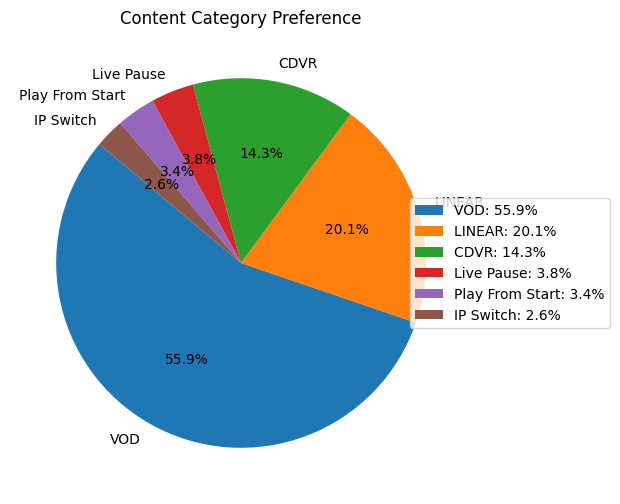

In [127]:
labels = content_categorywise_percentages.keys()
values = content_categorywise_percentages.values()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a legend to the left of the pie chart with percentage weightage
plt.legend(loc='center left', bbox_to_anchor=(0.85, 0.5), labels=[f'{label}: {value:.1f}%' for label, value in content_categorywise_percentages.items()])

# Add a title
plt.title("Content Category Preference")

# Display the plot
plt.show()

# list of distinct content (T.V Shows)

In [73]:
content_series = nz_duration_df['content'].value_counts()

 * ***the value_counts() method will always return a pandas series with unique indexes so no need to worry about the uniqueness of index names***

In [74]:
content_series

(L) BWF World Championships: Finals     67383
(L) PL: Newcastle vs Liverpool          64652
(L) PL: Sheffield vs Manchester City    44269
Tiktok Awards Malaysia                  30181
The Flash [Fast Premiere]               29244
                                        ...  
Semakin Cinta, Shuib                        1
Mosaic S1 Ep01                              1
Ceria Megastar 2020 Eksklusif Ep14          1
Key Witness Ep11                            1
Tong Tong's Wonderland S3 Ep10              1
Name: content, Length: 52835, dtype: int64

In [75]:
nz_duration_df.shape[0]

4216916

In [76]:
len(content_series)

52835

In [77]:
print(content_series.index.nunique()) # using nunique() method

52835


In [78]:
no_of_shows = content_series.index.nunique()

In [79]:
sampled_df.shape[0]

4966806

## There are almost 4966806 distinct shows. Below is top 20


In [80]:
content_series.head(10)

(L) BWF World Championships: Finals     67383
(L) PL: Newcastle vs Liverpool          64652
(L) PL: Sheffield vs Manchester City    44269
Tiktok Awards Malaysia                  30181
The Flash [Fast Premiere]               29244
Super Singer Junior                     26015
(L) Formula 1 Main Race 2023            23054
FIBA: Latvia vs Lebanon                 20731
Start Music                             17960
Buletin Utama                           17656
Name: content, dtype: int64

### bottom 20 TV shows

In [81]:
content_series.tail(20)

Sleep Right, Sleep Tight S1 Ep05      1
Mounaragam 2 Ep108                    1
Perfect Partner Ep14                  1
A Time to Remember Ep19               1
Mind Blowing Breakthroughs S3 Ep11    1
Mountain Men S11 Ep151                1
Lara Aishah Ep33                      1
New World Ep19                        1
7 Aam Uyir Ep006                      1
Pick Me Up to Malaysia Ep14           1
Kollaikkaran                          1
Crime Patrol Dial 100 Ep284           1
The Kitchen S22 Ep07                  1
Hunting Ep34                          1
Dia Tetap Ayah Ep12                   1
Semakin Cinta, Shuib                  1
Mosaic S1 Ep01                        1
Ceria Megastar 2020 Eksklusif Ep14    1
Key Witness Ep11                      1
Tong Tong's Wonderland S3 Ep10        1
Name: content, dtype: int64

## sports shows are most watched

In [82]:
distinct_contents_dictionary = content_series.to_dict()

In [83]:
len(distinct_contents_dictionary)

52835

In [84]:
distinct_contents_dictionary

{'(L) BWF World Championships: Finals': 67383,
 '(L) PL: Newcastle vs Liverpool': 64652,
 '(L) PL: Sheffield vs Manchester City': 44269,
 'Tiktok Awards Malaysia': 30181,
 'The Flash [Fast Premiere]': 29244,
 'Super Singer Junior': 26015,
 '(L) Formula 1 Main Race 2023': 23054,
 'FIBA: Latvia vs Lebanon': 20731,
 'Start Music': 17960,
 'Buletin Utama': 17656,
 '(L) World Athletics Championships 2023': 17342,
 'Pathaan': 16100,
 '2000 Prime Talk': 15090,
 'Rajuk Karina': 14302,
 'Saregamapa Little Champs': 13965,
 'Evening Edition': 13173,
 'Sepahtu Reunion Live S8 Ep07': 12289,
 '(L) Miss Hong Kong Pageant 2023': 12237,
 'Varalaru': 12086,
 'Narcotics Heroes': 11740,
 'Baagyaletchumi Illatharisiyin Kadhai': 10761,
 '(L) MSL 2023: PRK lwn KLC': 10709,
 'Running Man': 10502,
 'MasterChef Australia': 10338,
 'Pandian Stores': 10243,
 'Thamizhum Saraswathiyum': 9755,
 'Super Nabil Ep01': 9684,
 '(L) PL: Burnley vs Aston Villa': 8886,
 'MW3: Newcastle United vs Liverpool': 8601,
 'Siragadik

In [85]:
# since the dictionary is too big lets only see the first few elements
# first_few_elements = 10
# for key, value in distinct_contents_dictionary.items():
#   print(key, ":", distinct_contents_dictionary[key])
#   first_few_elements -= 1
#   if first_few_elements == 0:
#     break

In [86]:
len(distinct_contents_dictionary)

52835

### ***non zero duration dataframe  is what % of orignal dataframe ?***

In [87]:
(nz_duration_df.shape[0] / initial_record_count) * 100

16.21144606249885

## List of distinct content providers

In [88]:
provider_list = nz_duration_df["content_source"].value_counts()

In [89]:
provider_list

astro.30d        1367688
astro.7d          551369
astro.com.my      307342
STAR VIJAY HD     169692
TV3               139673
                  ...   
CHUTTI TV              6
beIN SPORTS 4          3
astro.7d.ads           2
ARENA BOLA 3           2
Too FUN!               1
Name: content_source, Length: 183, dtype: int64

In [90]:
provider_list.index.nunique()

183

### top 20 content providers

In [91]:
provider_list.head(20) # seeing top 20 content providers

astro.30d         1367688
astro.7d           551369
astro.com.my       307342
STAR VIJAY HD      169692
TV3                139673
astro.2d           128850
ASSP4 HD           111034
ASSP3 HD            89233
ASSP HD             77139
SUN TV HD           57421
ZEE TAMIL HD        55825
AEC HD              54605
RIA HD              43427
beIN SPORTS         37966
CERIA HD            35980
Vellithirai HD      35060
VINMEEN HD          34009
TVBJ                31056
AXN HD              30400
ONE HD              28626
Name: content_source, dtype: int64

### bottom 20 content providers

In [92]:
provider_list.tail(20)

DW HD                 64
TA-DAA!               51
Boomerang             47
WAI FM                35
NAS FM                31
ProjectHighCouncil    26
OPUS                  26
V FM                  25
JAZZ                  24
ASYIK FM              23
astro.5d              20
CLASSIC ROCK          18
eGG Network           15
BAYU                  14
KENYALANG             14
CHUTTI TV              6
beIN SPORTS 4          3
astro.7d.ads           2
ARENA BOLA 3           2
Too FUN!               1
Name: content_source, dtype: int64

In [93]:
# ! pip install pandas_profiling
# from pandas_profiling import ProfileReport


In [94]:
# nz_duration_df_profile =  ProfileReport(nz_duration_df)
# nz_duration_df_profile.to_file(output_file = '/content/nz_duration_df_profile.html')

In [95]:
nz_duration_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4216916 entries, 14622656 to 21151475
Data columns (total 12 columns):
 #   Column            Dtype                         
---  ------            -----                         
 0   state             object                        
 1   event_start_tz    datetime64[ns, Asia/Singapore]
 2   duration_seconds  int64                         
 3   content_type      object                        
 4   content           object                        
 5   content_source    object                        
 6   date              datetime64[ns]                
 7   time              object                        
 8   timezone          object                        
 9   end_time          datetime64[ns, Asia/Singapore]
 10  timestamp         float64                       
 11  day               object                        
dtypes: datetime64[ns, Asia/Singapore](2), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 547.2+ MB


# Converting show names to lowercase

In [96]:
# Assuming you have a DataFrame named 'df' and you want to convert the 'content' column to lowercase
nz_duration_df['content'] = nz_duration_df['content'].str.lower()
nz_duration_df['content_source'] = nz_duration_df['content_source'].str.lower()


<ipython-input-96-e1850d734dd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nz_duration_df['content'] = nz_duration_df['content'].str.lower()
<ipython-input-96-e1850d734dd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nz_duration_df['content_source'] = nz_duration_df['content_source'].str.lower()


# ***Pre processing done!***

# ***Now the actual insight gaining starts***

In [97]:
nz_duration_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4216916 entries, 14622656 to 21151475
Data columns (total 12 columns):
 #   Column            Dtype                         
---  ------            -----                         
 0   state             object                        
 1   event_start_tz    datetime64[ns, Asia/Singapore]
 2   duration_seconds  int64                         
 3   content_type      object                        
 4   content           object                        
 5   content_source    object                        
 6   date              datetime64[ns]                
 7   time              object                        
 8   timezone          object                        
 9   end_time          datetime64[ns, Asia/Singapore]
 10  timestamp         float64                       
 11  day               object                        
dtypes: datetime64[ns, Asia/Singapore](2), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 547.2+ MB


In [98]:
nz_duration_df['state'].value_counts()

Kuala Lumpur       2350063
Selangor            892139
Penang              253079
Johor               244473
Perak               133713
Sarawak              78899
Negeri Sembilan      73099
Sabah                70325
Melaka               39363
Kedah                29873
Kelantan             20758
Pahang               17535
Terengganu           10342
Putrajaya             2445
Perlis                 691
Labuan                 119
Name: state, dtype: int64

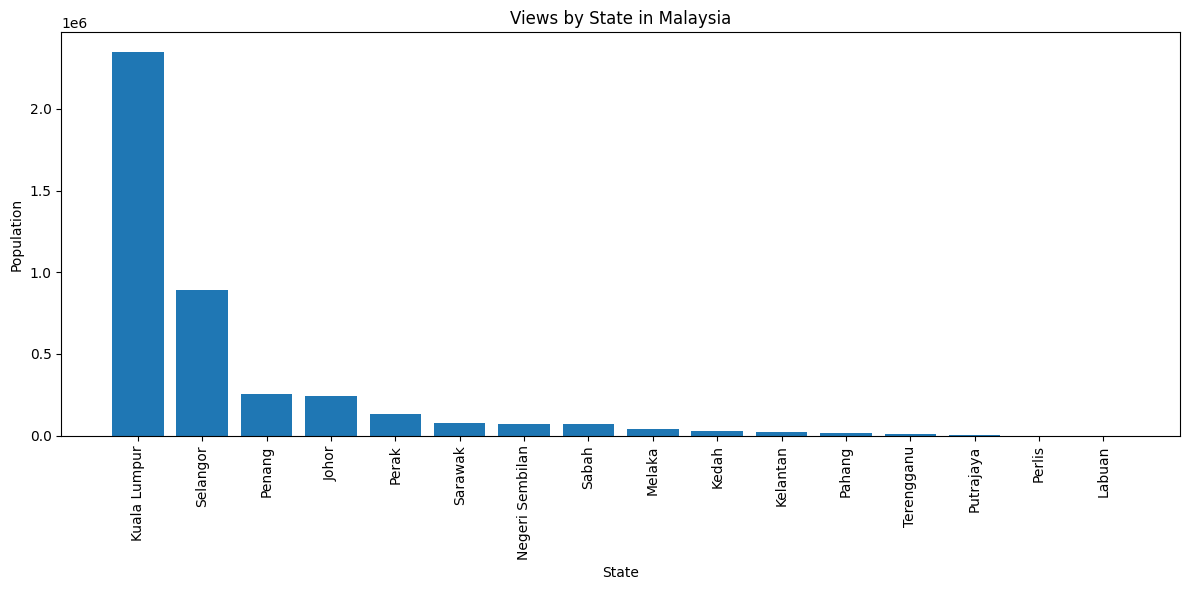

In [126]:

data = {
    'state': ['Kuala Lumpur', 'Selangor', 'Penang', 'Johor', 'Perak', 'Sarawak', 'Negeri Sembilan', 'Sabah', 'Melaka', 'Kedah', 'Kelantan', 'Pahang', 'Terengganu', 'Putrajaya', 'Perlis', 'Labuan'],
    'population': [2350063, 892139, 253079, 244473, 133713, 78899, 73099, 70325, 39363, 29873, 20758, 17535, 10342, 2445, 691, 119]
}

df = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

plt.bar(df['state'], df['population'])
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Views by State in Malaysia')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.tight_layout()
plt.show()


In [99]:
nz_duration_df['content_type'].value_counts()

VOD                2356309
LINEAR              848751
CDVR                602912
Live Pause          158746
Play From Start     142659
IP Switch           107539
Name: content_type, dtype: int64

In [100]:
nz_duration_df['day'].value_counts()

Monday    2214728
Sunday    2002188
Name: day, dtype: int64

## Avg  TV watching time per state

In [101]:

avg_watchtime_per_state_in_min = nz_duration_df.groupby('state')['duration_seconds'].mean() / 60

# Print the average TV watching time for each state in hours
print(avg_watchtime_per_state_in_min)

state
Johor               9.534678
Kedah               9.224768
Kelantan            9.336180
Kuala Lumpur        9.907666
Labuan             14.923950
Melaka              9.025246
Negeri Sembilan     9.518626
Pahang              9.851809
Penang              9.783338
Perak               9.354600
Perlis              6.338833
Putrajaya          11.232277
Sabah              10.100921
Sarawak            10.471232
Selangor           10.371892
Terengganu          8.590290
Name: duration_seconds, dtype: float64


# Bar graph of avg TV watch duration statewise

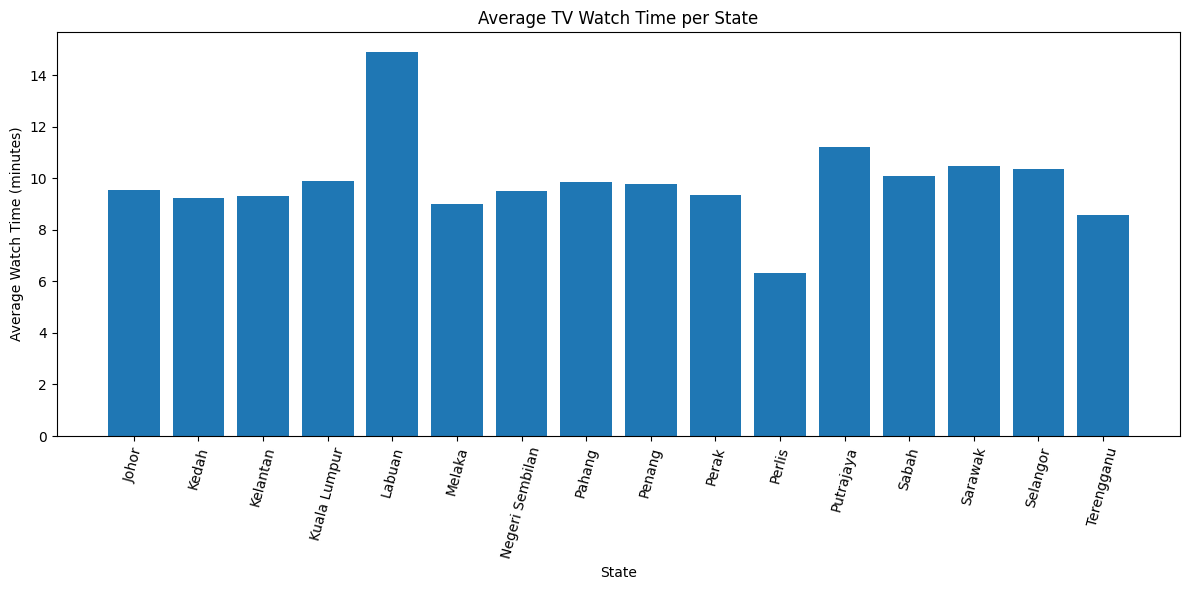

In [102]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(avg_watchtime_per_state_in_min.index, avg_watchtime_per_state_in_min)

# Rotate the X-axis labels by 75 degrees
plt.xticks(rotation=75)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Average Watch Time (minutes)')
plt.title('Average TV Watch Time per State')

# Show the plot
plt.tight_layout()  # Ensures labels and title are visible
plt.show()

> ## ***People of Labuan spends more time watching TV***

# No of people watching TV on Sunday Vs Monday

In [103]:
number_of_people_watching_tv_per_day = nz_duration_df['day'].value_counts()

# Print the number of people watching TV on each day of the week
number_of_people_watching_tv_per_day

Monday    2214728
Sunday    2002188
Name: day, dtype: int64

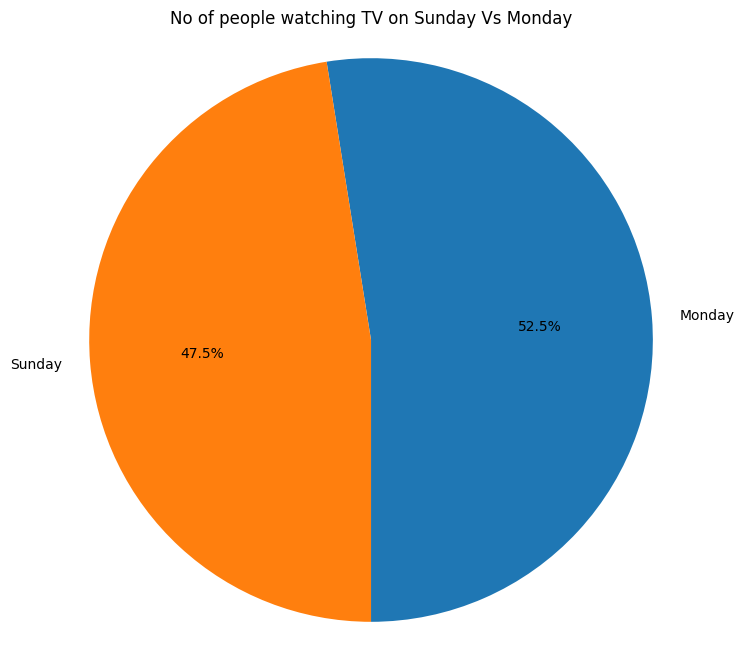

In [104]:
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(number_of_people_watching_tv_per_day, labels=number_of_people_watching_tv_per_day.index, autopct='%1.1f%%', startangle=270)

# Add a title
plt.title('No of people watching TV on Sunday Vs Monday')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

> ## Almost same though slightly more people watch TV on Monday than sunday

# Dividing the watch time zones

In [105]:
# import pandas as pd

# Filter data for Sunday and Monday
sunday_data = nz_duration_df[nz_duration_df['day'] == 'Sunday']
monday_data = nz_duration_df[nz_duration_df['day'] == 'Monday']

# Define time period bins
time_bins = [
    '12:00 AM to 3:00 AM',
    '3:00 AM to 6:00 AM',
    '6:00 AM to 9:00 AM',
    '9:00 AM to 12:00 PM',
    '12:00 PM to 3:00 PM',
    '3:00 PM to 6:00 PM',
    '6:00 PM to 9:00 PM',
    '9:00 PM to 12:00 AM'
]

# Create a function to categorize times into bins
def categorize_time(time):
    hour = time.hour
    if hour < 3:
        return time_bins[0]
    elif hour < 6:
        return time_bins[1]
    elif hour < 9:
        return time_bins[2]
    elif hour < 12:
        return time_bins[3]
    elif hour < 15:
        return time_bins[4]
    elif hour < 18:
        return time_bins[5]
    elif hour < 21:
        return time_bins[6]
    else:
        return time_bins[7]

# Apply the categorization function to create a new column 'time_period'
sunday_data['time_period'] = sunday_data['event_start_tz'].apply(categorize_time)
monday_data['time_period'] = monday_data['event_start_tz'].apply(categorize_time)

# Get the counts for each time period for Sunday and Monday separately
sunday_time_counts = sunday_data['time_period'].value_counts()
monday_time_counts = monday_data['time_period'].value_counts()


<ipython-input-105-7f17fd0986e8>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunday_data['time_period'] = sunday_data['event_start_tz'].apply(categorize_time)
<ipython-input-105-7f17fd0986e8>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monday_data['time_period'] = monday_data['event_start_tz'].apply(categorize_time)


# ***Sunday time period counts***

In [106]:
# Display the counts for Sunday and Monday
sunday_time_counts


9:00 PM to 12:00 AM    502722
6:00 PM to 9:00 PM     419100
12:00 PM to 3:00 PM    351645
3:00 PM to 6:00 PM     345842
9:00 AM to 12:00 PM    315729
6:00 AM to 9:00 AM      66750
12:00 AM to 3:00 AM       215
3:00 AM to 6:00 AM        185
Name: time_period, dtype: int64

In [107]:
sunday_time_counts.sum()

2002188

In [108]:
sunday_time_slot_dict = sunday_time_counts.to_dict()

In [109]:
sunday_time_slot_percentages = {}
for slot in sunday_time_slot_dict:
  sunday_time_slot_percentages[slot] = (sunday_time_slot_dict[slot] / sunday_time_counts.sum()) * 100

# Most engaged time periods

In [110]:
sunday_time_slot_percentages

{'9:00 PM to 12:00 AM': 25.108631157513678,
 '6:00 PM to 9:00 PM': 20.932100282291174,
 '12:00 PM to 3:00 PM': 17.563036038573802,
 '3:00 PM to 6:00 PM': 17.273203115791326,
 '9:00 AM to 12:00 PM': 15.769198496844453,
 '6:00 AM to 9:00 AM': 3.333852765075008,
 '12:00 AM to 3:00 AM': 0.010738252351926993,
 '3:00 AM to 6:00 AM': 0.009239891558634854}

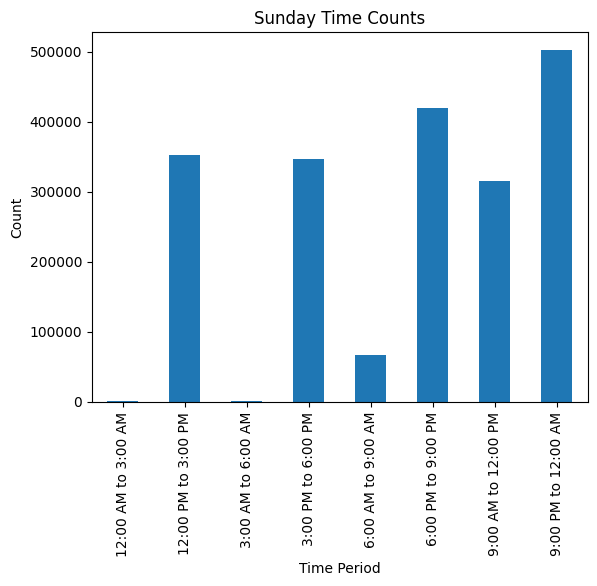

In [111]:
sunday_time_counts = sunday_time_counts.sort_index()
sunday_time_counts.plot(kind='bar')
plt.title('Sunday Time Counts')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

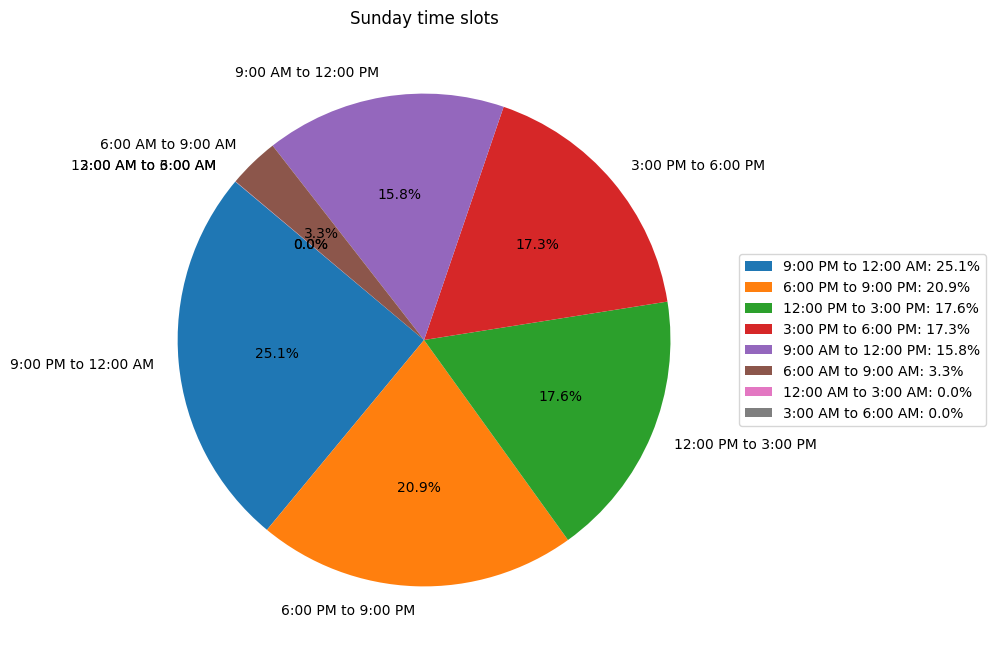

In [112]:
import matplotlib.pyplot as plt

# Given dictionary
data = sunday_time_slot_percentages

# Extract labels and percentages
labels = data.keys()
percentages = data.values()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title("Sunday time slots")

# Create a legend with labels and percentages
legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in data.items()]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.show()


# Monday time period counts

In [113]:
monday_time_counts

6:00 PM to 9:00 PM     449931
9:00 PM to 12:00 AM    428783
12:00 PM to 3:00 PM    366673
3:00 PM to 6:00 PM     359916
9:00 AM to 12:00 PM    315089
12:00 AM to 3:00 AM    159760
6:00 AM to 9:00 AM     109758
3:00 AM to 6:00 AM      24818
Name: time_period, dtype: int64

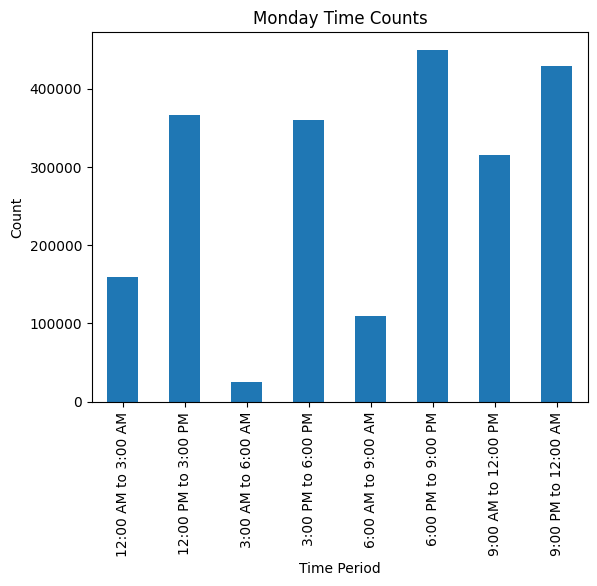

In [114]:
monday_time_counts = monday_time_counts.sort_index()

monday_time_counts.plot(kind='bar')
plt.title('Monday Time Counts')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.show()

In [115]:
monday_time_slot_dict = monday_time_counts.to_dict()

In [116]:
monday_time_slot_percentages = {}
for slot in monday_time_slot_dict:
  monday_time_slot_percentages[slot] = (monday_time_slot_dict[slot] / monday_time_counts.sum()) * 100

# most engaged watching slots on monday

In [117]:
monday_time_slot_percentages

{'12:00 AM to 3:00 AM': 7.213526898111191,
 '12:00 PM to 3:00 PM': 16.55611885522737,
 '3:00 AM to 6:00 AM': 1.1205890745951648,
 '3:00 PM to 6:00 PM': 16.251024956563516,
 '6:00 AM to 9:00 AM': 4.9558230175443665,
 '6:00 PM to 9:00 PM': 20.31540667747913,
 '9:00 AM to 12:00 PM': 14.226984081115152,
 '9:00 PM to 12:00 AM': 19.36052643936411}

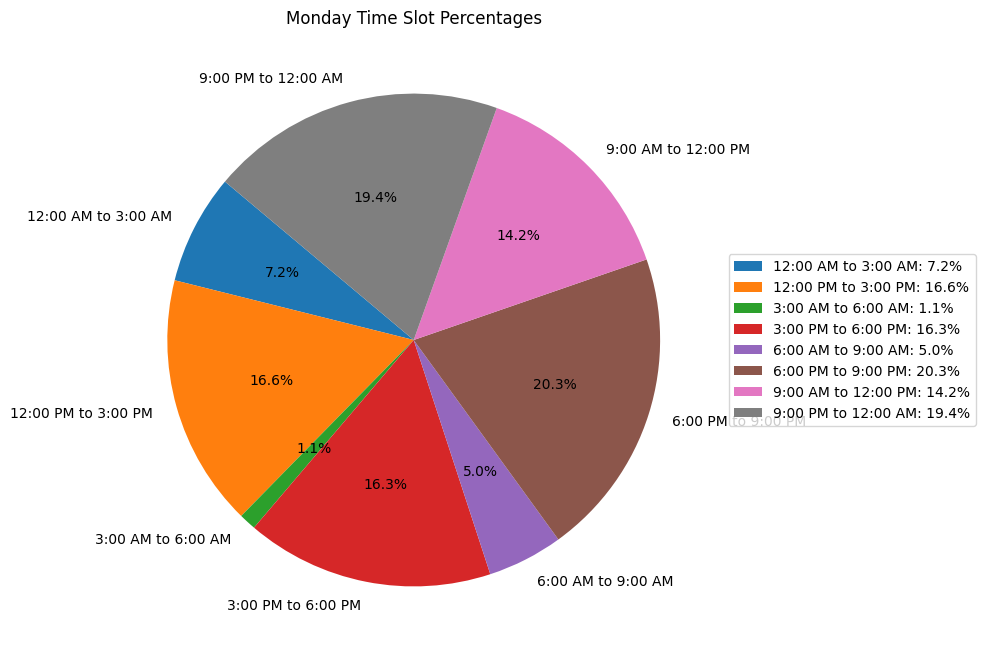

In [118]:
import matplotlib.pyplot as plt

# Given dictionary
data = monday_time_slot_percentages

# Extract labels and percentages
labels = data.keys()
percentages = data.values()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title("Monday Time Slot Percentages")

# Create a legend with labels and percentages
legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in data.items()]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.show()


# Categorize based on duration watched
> less than 7 sec

In [119]:
print("Percentage of shows watched less than 7 sec: ",len(nz_duration_df[nz_duration_df['duration_seconds'] < 7]) / len(nz_duration_df) *100, "%")


Percentage of shows watched less than 7 sec:  12.569588770561236 %


> less than 120 sec

In [120]:
# Define the DataFrame 'nz_duration_df'
# Assuming you have a DataFrame named 'nz_duration_df'

# Define the duration ranges in seconds
ranges = [
    (0, 60),    # Less than 1 minute
    (60, 120),  # 1-2 minutes
    (120, 300), # 2-5 minutes
    (300, 600), # 5-10 minutes
    (600, 900), # 10-15 minutes
    (900, 1800), # 15-30 minutes
    (1800, 2700), # 30-45 minutes
    (2700, 3600), # 45-60 minutes
    (3600, 7200), # 1-2 hours
    (7200, 10800), # 2-3 hours
    (10800, 14400), # 3-4 hours
    (14400, 18000), # 4-5 hours
    (18000, 21600), # 5-6 hours
    (21600, 25200), # 6-7 hours
    (25200, 28800), # 7-8 hours
    (28800, 32400)  # 8-9 hours
]

# Initialize counters for each range
counters = [0] * len(ranges)

# Count the number of records in each range
for i, (start, end) in enumerate(ranges):
    counters[i] = ((nz_duration_df['duration_seconds'] > start) & (nz_duration_df['duration_seconds'] <= end)).sum()

# Calculate the total number of records
total_records = len(nz_duration_df)

# Calculate the percentages and print the results
for i, (start, end) in enumerate(ranges):
    percentage = (counters[i] / total_records) * 100
    if end < 60:
        print(f"Less than {end} seconds: {percentage:.2f}%")
    elif end < 3600:
        print(f"{start // 60} - {end // 60} minutes: {percentage:.2f}%")
    else:
        print(f"{start // 3600} - {end // 3600} hours: {percentage:.2f}%")


0 - 1 minutes: 27.42%
1 - 2 minutes: 12.57%
2 - 5 minutes: 17.33%
5 - 10 minutes: 18.95%
10 - 15 minutes: 5.68%
15 - 30 minutes: 9.84%
30 - 45 minutes: 3.47%
0 - 1 hours: 2.24%
1 - 2 hours: 2.25%
2 - 3 hours: 0.16%
3 - 4 hours: 0.02%
4 - 5 hours: 0.02%
5 - 6 hours: 0.02%
6 - 7 hours: 0.01%
7 - 8 hours: 0.01%
8 - 9 hours: 0.01%


# shows with least watched and most watched duration

In [121]:

# Calculate the average watch duration for each show (content)
average_watch_duration = nz_duration_df.groupby('content')['duration_seconds'].mean()

# Sort the shows by average watch duration in descending order
sorted_shows = average_watch_duration.sort_values(ascending=False)

# Get the top 50 shows with the highest average watch duration
top_100_shows = sorted_shows.head(100)

# Print the top 50 shows and their average watch duration in hours
for rank, (content, duration) in enumerate(top_100_shows.iteritems(), start=1):
    # Convert duration to hours
    duration_hours = duration / 3600

    # Print the rank, content, and duration in hours
    print(f"{content}:\n{duration_hours:.2f}")


komedi unplugged ep12:
8.69
naagin s5 ep047:
8.61
the dance of the storm ep40:
8.35
badminton unlimited 2020 ep09:
7.71
pat the dog s2 ep36:
7.39
the staircase s1 ep05:
7.38
chef terjun ep06:
7.07
vettai s4 ep48:
7.01
nasihat ep10:
5.97
storage hunters s1 ep20:
5.67
billionaire story ep114:
5.66
super singer junior s8 ep03:
5.39
power players s2 ep18:
5.24
batwoman s1 ep13:
4.92
impiana s3 ep02:
4.55
dark angel ep09:
4.42
wwe raw 2023 ep17:
4.31
wrestlemania 11:
4.23
drakula cantik ep07:
3.97
crazy 15 seconds s1 ep15:
3.90
insecure s5 ep08:
3.82
vidhya no 1 ep482:
3.67
astro cgm 2017 ep16:
3.66
take us home ep15:
3.60
aku bukan bimbo ep07:
3.59
pyaar ke saat vachan dharam patni ep126:
3.49
long weekend getaways s2 ep02:
3.34
pop aye:
3.31
1,2,3 freeze s1 ep48:
3.23
dawn of the croods s2 ep32:
3.17
mush-mush and the mushables s1 ep22:
3.06
tokyo vice s1 ep08:
3.00
winning time: the rise of the lakers dynasty s1 ep09:
2.96
insectibles s1 ep09:
2.95
tong tong's wonderland s1 ep11:
2.95
ha

<ipython-input-121-0777d68c028f>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rank, (content, duration) in enumerate(top_100_shows.iteritems(), start=1):
